In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
# import imputena
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

mpl.rcParams['figure.dpi'] = 200

In [2]:
data_b = pd.read_csv('/home/piotr_gnome/Downloads/FiveCitiePMData/BeijingPM20100101_20151231.csv')
data_b.columns

Index(['No', 'year', 'month', 'day', 'hour', 'season', 'PM_Dongsi',
       'PM_Dongsihuan', 'PM_Nongzhanguan', 'PM_US Post', 'DEWP', 'HUMI',
       'PRES', 'TEMP', 'cbwd', 'Iws', 'precipitation', 'Iprec'],
      dtype='object')

In [3]:
data_b.describe()

,No,year,month,day,hour,season,PM_Dongsi,PM_Dongsihuan,PM_Nongzhanguan,PM_US Post,DEWP,HUMI,PRES,TEMP,Iws,precipitation,Iprec
count,52584.000000,52584.000000,52584.000000,52584.000000,52584.000000,52584.000000,25052.000000,20508.000000,24931.000000,50387.000000,52579.000000,52245.000000,52245.000000,52579.000000,52579.000000,52100.000000,52100.000000
mean,26292.500000,2012.499772,6.523962,15.726609,11.500000,2.491100,89.154439,92.560806,88.643737,95.904241,2.074554,54.602421,1016.465442,12.587040,23.261829,19.258683,19.519008
std,15179.837614,1.707485,3.448452,8.798896,6.922252,1.116988,87.239267,88.027434,88.041166,91.643772,14.222059,25.991338,10.295070,12.098527,49.281706,4381.035532,4381.036040
min,1.000000,2010.000000,1.000000,1.000000,0.000000,1.000000,3.000000,3.000000,3.000000,1.000000,-40.000000,2.000000,991.000000,-19.000000,0.450000,0.000000,0.000000
25%,13146.750000,2011.000000,4.000000,8.000000,5.750000,1.000000,24.000000,28.000000,24.000000,27.000000,-10.000000,31.000000,1008.000000,2.000000,1.790000,0.000000,0.000000
50%,26292.500000,2012.000000,7.000000,16.000000,11.500000,2.000000,64.000000,68.000000,62.000000,69.000000,2.000000,55.000000,1016.000000,14.000000,4.920000,0.000000,0.000000
75%,39438.250000,2014.000000,10.000000,23.000000,17.250000,3.000000,124.000000,127.000000,122.000000,132.000000,15.000000,78.000000,1025.000000,23.000000,21.020000,0.000000,0.000000
max,52584.000000,2015.000000,12.000000,31.000000,23.000000,4.000000,737.000000,672.000000,844.000000,994.000000,28.000000,100.000000,1046.000000,42.000000,585.600000,999990.000000,999990.000000


In [4]:
data_b.head()

,No,year,month,day,hour,season,PM_Dongsi,PM_Dongsihuan,PM_Nongzhanguan,PM_US Post,DEWP,HUMI,PRES,TEMP,cbwd,Iws,precipitation,Iprec
0,1,2010,1,1,0,4,NaN,NaN,NaN,NaN,-21.0,43.0,1021.0,-11.0,NW,1.79,0.0,0.0
1,2,2010,1,1,1,4,NaN,NaN,NaN,NaN,-21.0,47.0,1020.0,-12.0,NW,4.92,0.0,0.0
2,3,2010,1,1,2,4,NaN,NaN,NaN,NaN,-21.0,43.0,1019.0,-11.0,NW,6.71,0.0,0.0
3,4,2010,1,1,3,4,NaN,NaN,NaN,NaN,-21.0,55.0,1019.0,-14.0,NW,9.84,0.0,0.0
4,5,2010,1,1,4,4,NaN,NaN,NaN,NaN,-20.0,51.0,1018.0,-12.0,NW,12.97,0.0,0.0


In [5]:
cols_pm = ['PM_Dongsi', 'PM_Dongsihuan', 'PM_Nongzhanguan', 'PM_US Post']
data_b['PM'] = data_b[cols_pm].median(axis=1)
data_b = data_b.drop(cols_pm, 1)

<AxesSubplot:>

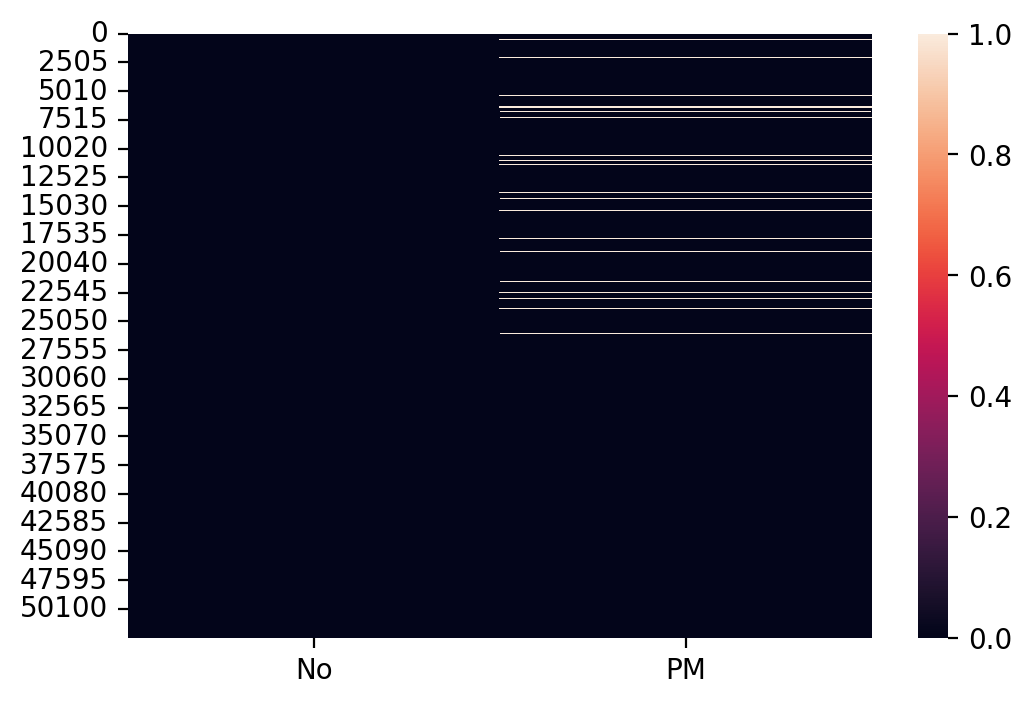

In [6]:
# sns.heatmap(data_b.iloc[13500:15000].isnull())
# a = data_b[['No', 'PM']]
sns.heatmap(data_b[['No', 'PM']].isnull()) #

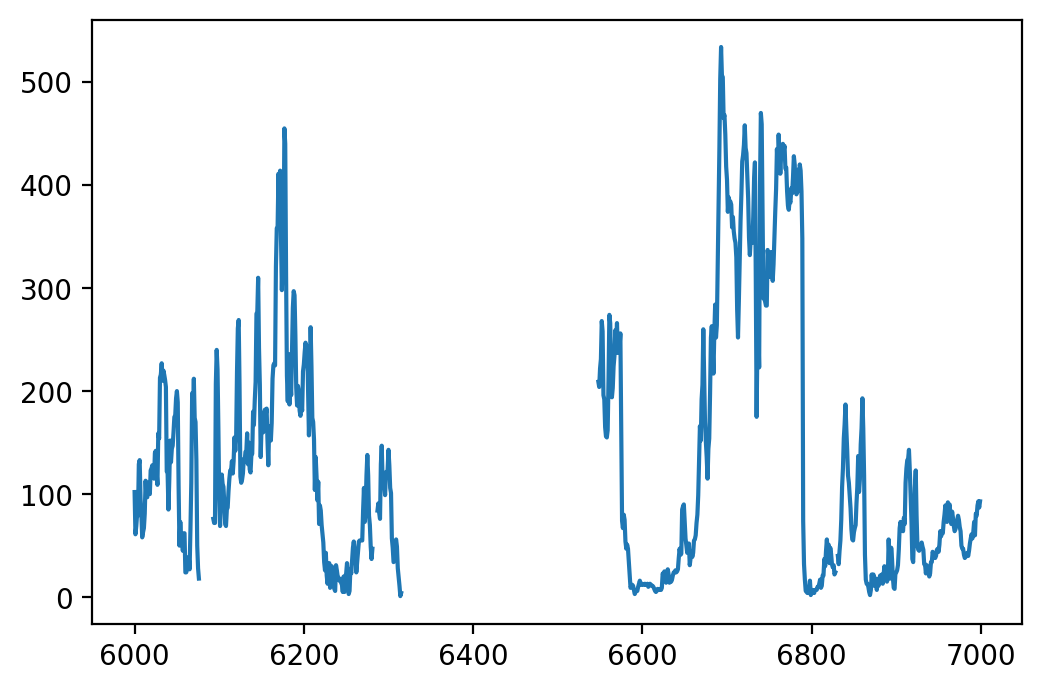

In [7]:
plt.plot(data_b.PM[6000:7000])

In [8]:
data_b['PM_i'] = data_b['PM'].interpolate(method='linear', limit=5)


In [9]:
cols_ctg = ['month', 'day', 'hour', 'season', 'cbwd']
cols_ohe_names = []

data_b_copy = data_b.copy()
for col in cols_ctg:
    cols_ohe = pd.get_dummies(data_b[col])
    cols_ohe_renamed = cols_ohe.rename(mapper=(lambda x: col + '_' + str(x)), axis=1)
    cols_ohe_names += list(cols_ohe_renamed.columns)
    data_b_copy = pd.concat([data_b_copy, cols_ohe_renamed], axis=1)
# b = pd.concat([a, cols_ohe_renamed], axis=1)
data_b_copy.columns
data_b = data_b_copy
# for col in cols_ctg:
#     cols_ohe = pd.get_dummies(data_b[col])
#     pd.concat([data_b, cols_ohe], axis=1)

In [10]:
cols_with_nan = ['DEWP', 'HUMI', 'PRES', 'TEMP', 'Iws', 'precipitation', 'Iprec', 'PM']
cols_missing = []
# cols_missing = [col+'_missing' for col in cols_with_nan]
# for col in cols_missing:
#     data_b[col] = ''
# data_b[cols_missing] = data_b[cols_missing].apply(pd.isna)
for col in cols_with_nan:
    col_missing = col + '_missing'
    cols_missing.append(col_missing)
    data_b[col_missing] = ''
    data_b[col_missing] = data_b[col].isnull()
print(data_b['DEWP'][data_b['DEWP_missing']])
print(data_b['PM_missing'].sum())
# data_b[cols_missing].apply()
# for col in cols_missing:
#     col_missing = col + '_missing'
#     data_b[cols_missing] = data_b[col].isnull()
# data_b['PM_missing'] = data_b['PM'].isnull()

45922   NaN
47954   NaN
49271   NaN
51328   NaN
51891   NaN
Name: DEWP, dtype: float64
1894


In [11]:
def seasonal_interpolate_series(data, period, dec_model='multiplicative', int_method='linear',
        int_direction='both'):
    """Auxiliary function that interpolates a series with seasonal
    adjustment. It always returns a copy.
    :param data: The series on which to perform the operation.
    :type data: pandas.Series
    :param dec_model: The decomposition model to use. Passed to
        statsmodels.tsa.seasonal.seasonal_decompose().
    :type dec_model: {'multiplicative', 'additive'}
    :param int_method: The interpolation model to use. Passed to
        pandas.DataFrame.interpolate()
    :type int_method: {'linear', 'quadratic', 'cubic'}
    :param int_direction: Direction in which to interpolate values. Passed to
        pandas.DataFrame.interpolate()
    :type int_direction: {'forward', 'backward', 'both'}
    :return: The data interpolated with seasonal adjustment.
    :rtype: pandas.Series
    """
    # This function aways returns a copy. The parent function takes care of
    # assigning its results to the same series or data frame if the
    # operation is to be made inplace.
    res = data.copy()
    # kwargs for the pandas interpolate() function:
    int_kwargs = {'limit_direction': int_direction}
    # 1. Missing data index:
    na_index = pd.isna(data)
    # 2. Interpolate NAs:
    temp = data.interpolate(method=int_method, **int_kwargs)
    # 3. Decompose:
    dr = seasonal_decompose(temp, model=dec_model, period=period)
    # 4. Join trend and irregular component (timeseries without seasonality):
    if dec_model == 'multiplicative':
        data_no_seasonality = dr.trend * dr.resid
    if dec_model == 'additive':
        data_no_seasonality = dr.trend + dr.resid
    # 5. Fill in NA values:
    data_no_seasonality[na_index] = np.nan
    # 6. Interpolate data without seasonality:
    data_no_seasonality_imputed = data_no_seasonality.interpolate(
        method=int_method, **int_kwargs)
    # 7. Add back seasonality:
    if dec_model == 'multiplicative':
        data_imputed = data_no_seasonality_imputed * dr.seasonal
    if dec_model == 'additive':
        data_imputed = data_no_seasonality_imputed + dr.seasonal
    # 8. Merge interpolated values into original timeseries:
    res[na_index] = data_imputed[na_index]
    # Return the seasonally interpolated series:
    return res
# data_b['PM_i'] = imputena.seasonal_interpolation(data_b['PM_i'], period=24)

<AxesSubplot:xlabel='precipitation', ylabel='Count'>

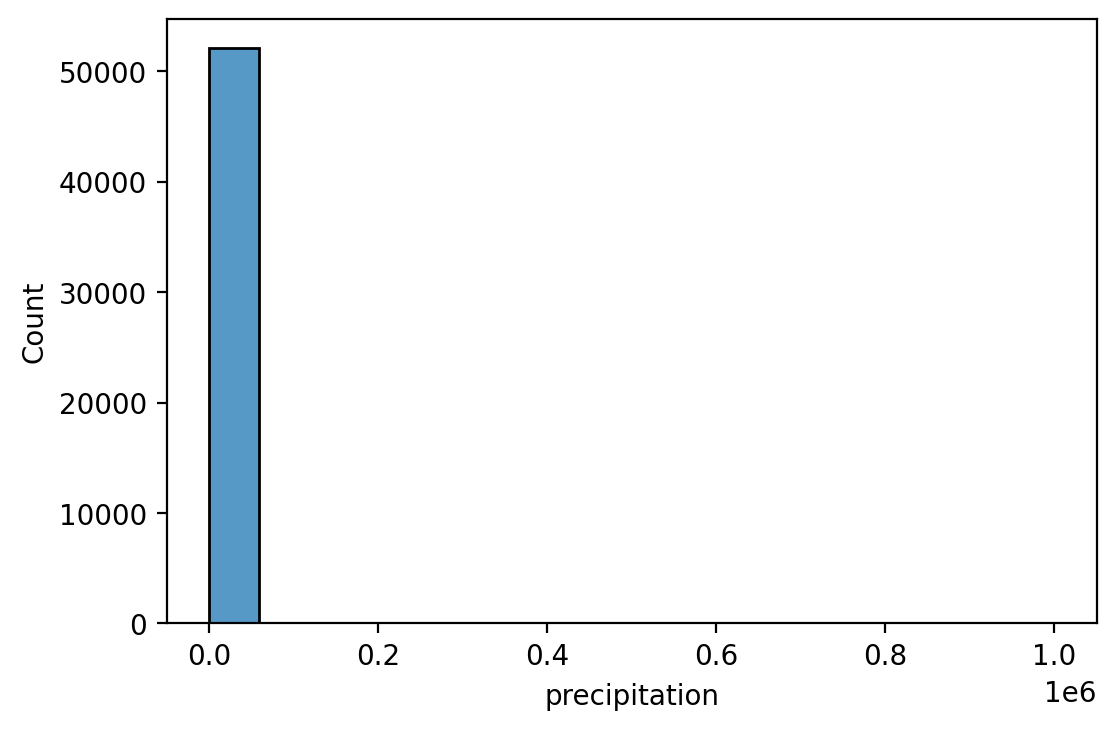

In [12]:
sns.histplot(data_b['precipitation'])

In [13]:
print(data_b['precipitation'].size)
a = data_b['precipitation']
a = a[a > 100]
print(a.size)

52584
1


<AxesSubplot:xlabel='precipitation', ylabel='Count'>

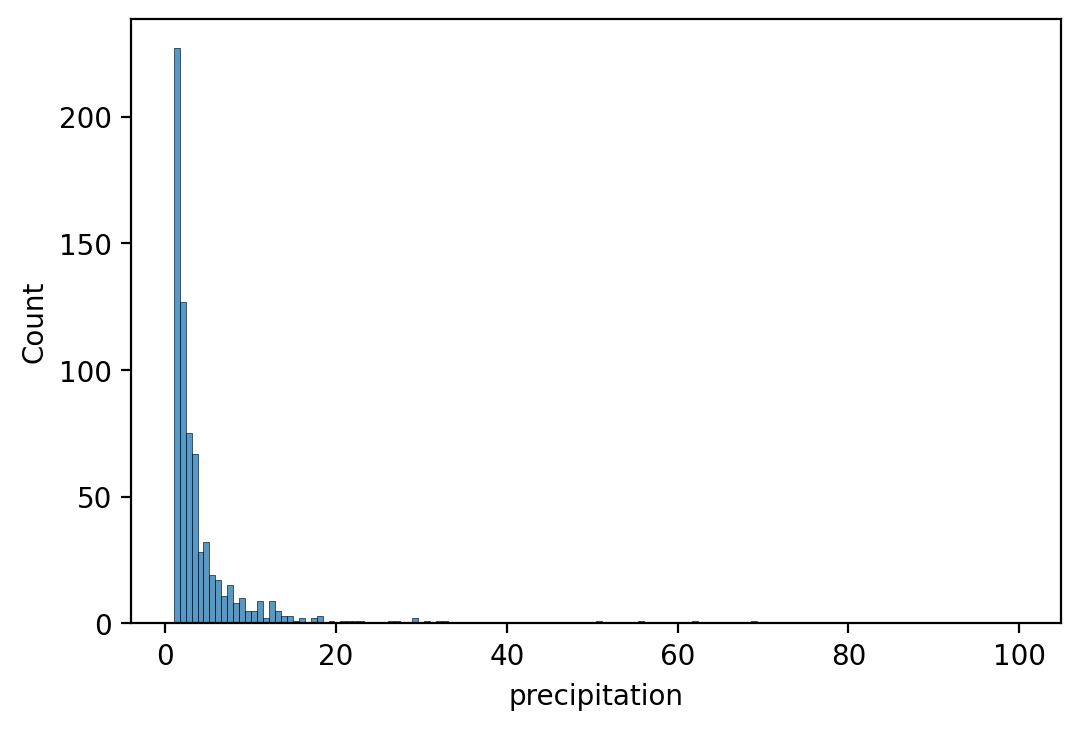

In [14]:
sns.histplot(data_b['precipitation'], binrange=(1, 100))

In [15]:
data_b['precipitation'][data_b['precipitation'] > 100] = np.nan
data_b['Iprec'][data_b['Iprec'] > 100] = np.nan

ipykernel_launcher:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
ipykernel_launcher:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [16]:
data_b['precipitation'] = data_b['precipitation'].interpolate(method='linear', limit=5)
data_b['Iprec'] = data_b['Iprec'].interpolate(method='linear', limit=5)

In [17]:
# data_b['PM_i'] = seasonal_interpolate_series(data_b['PM_i'], period=24)

In [18]:
# print(data_b['PM_i'][data_b['PM_i'].isnull()])
type(data_b['PM_i'][0])
data_b[data_b.isnull()] = np.nan
type(data_b['PM_i'][0])

numpy.float64

In [19]:
# data_b['cbwd'].unique()
# data_b['cbwd_missing'] = data_b['cbwd'].isnull()

In [20]:
# print(data_b['cbwd'][data_b['cbwd'] == 'cv'].shape)
# print(data_b['cbwd'][data_b['cbwd'].isnull()].shape)

In [21]:
# a = pd.get_dummies(data_b['cbwd'])
# print(a[data_b['cbwd'].isnull()])

In [22]:
data_b['day'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])

In [23]:
data_b.columns
cols_fill = ['DEWP', 'HUMI', 'PRES', 'TEMP', 'Iws', 'precipitation', 'Iprec', 'PM_i']
data_b_fill = data_b[cols_fill]

In [24]:
imp = IterativeImputer(max_iter=100, random_state=0)
data_b_fill = imp.fit_transform(data_b_fill)

In [27]:
data_b_fill = pd.DataFrame(data_b_fill, columns=cols_fill).round()

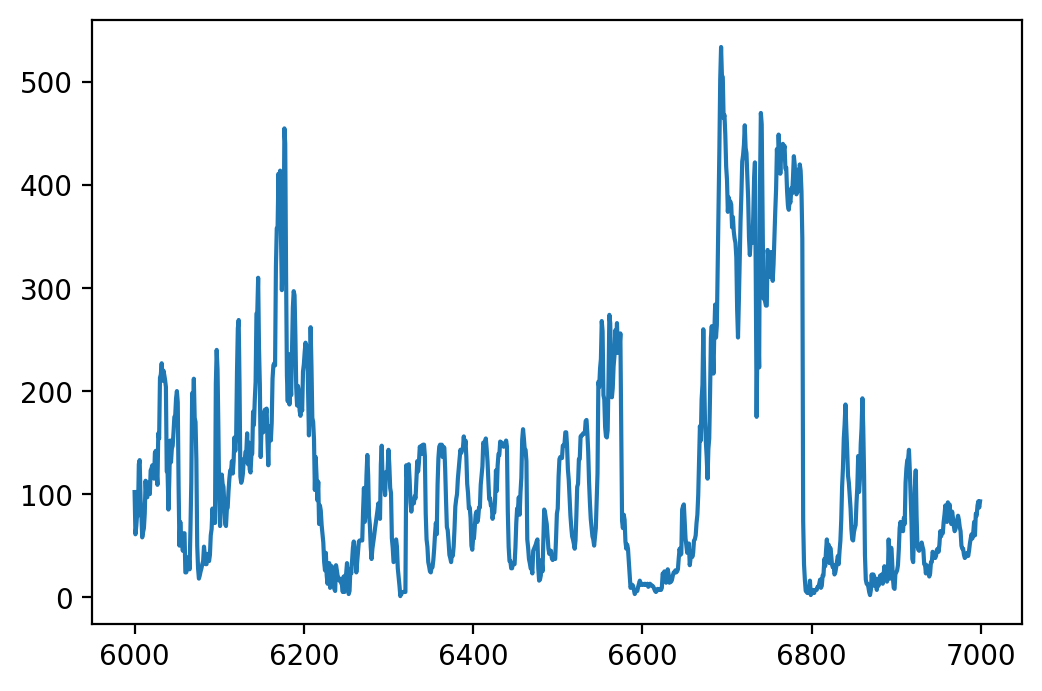

In [28]:
plt.plot(data_b_fill['PM_i'][6000:7000])

<AxesSubplot:xlabel='HUMI', ylabel='Count'>

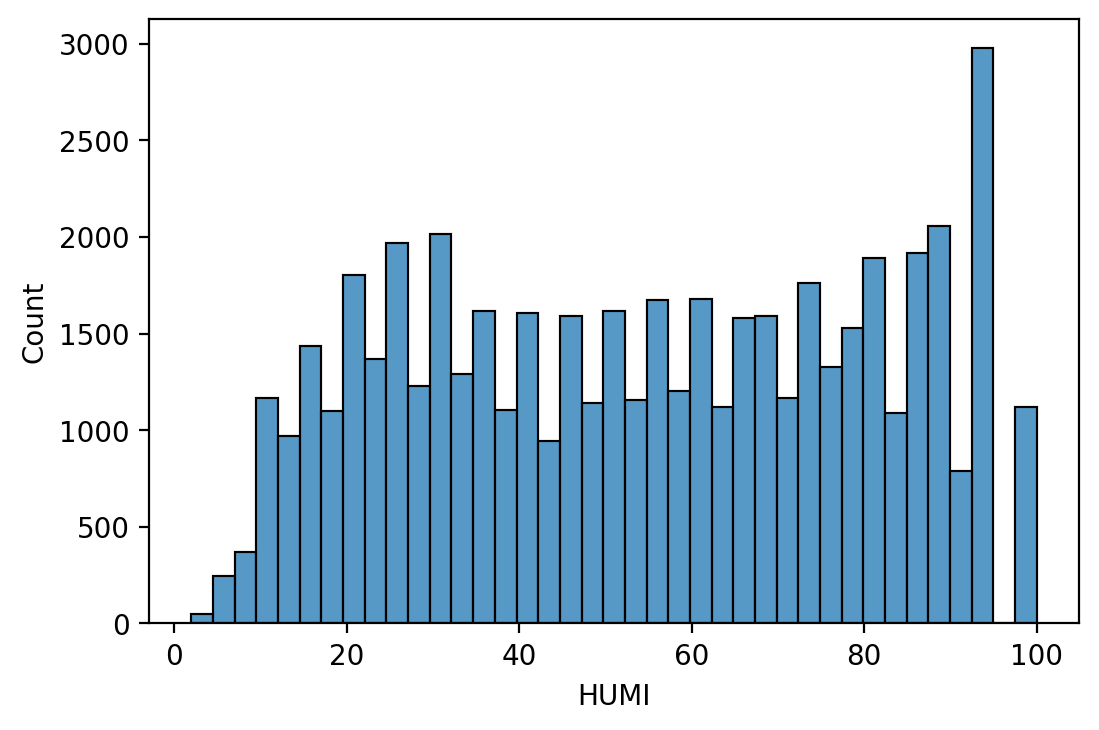

In [22]:
sns.histplot(data_b['HUMI'])

<AxesSubplot:>

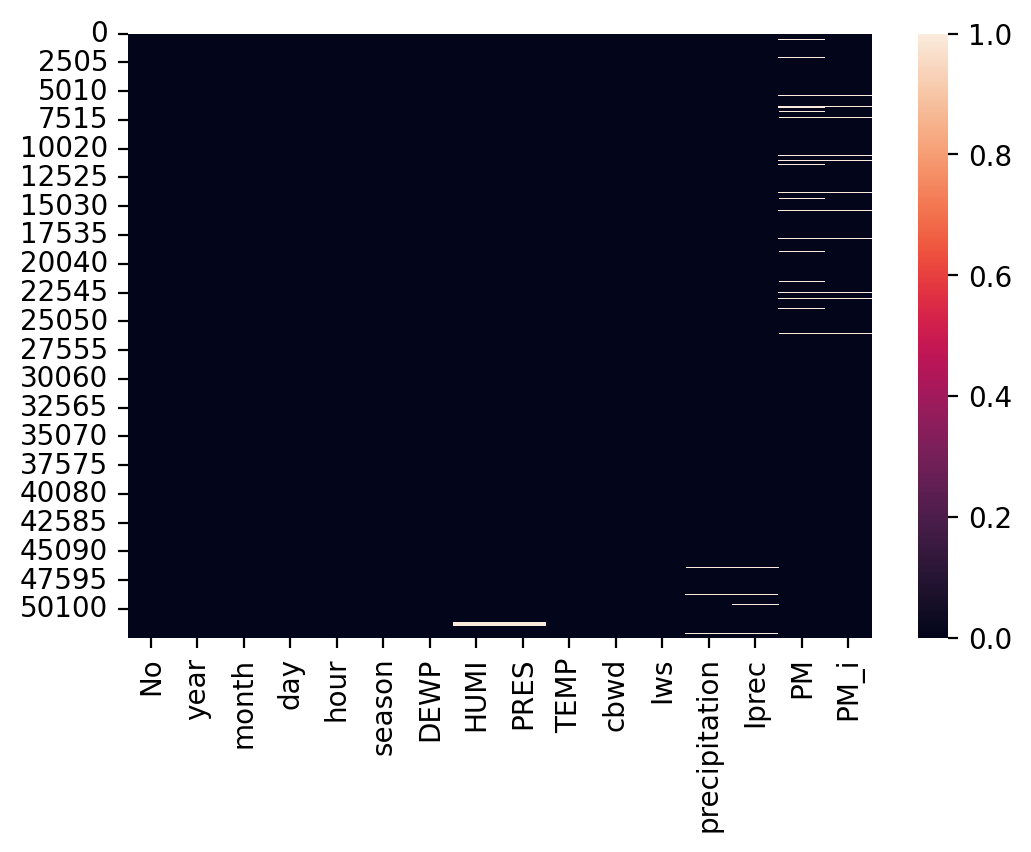

In [123]:
sns.heatmap(data_b.isnull())

In [ ]:
cols_rel = cols_fill + cols_ohe_names + cols_missing
data_b_rel = data_b[]

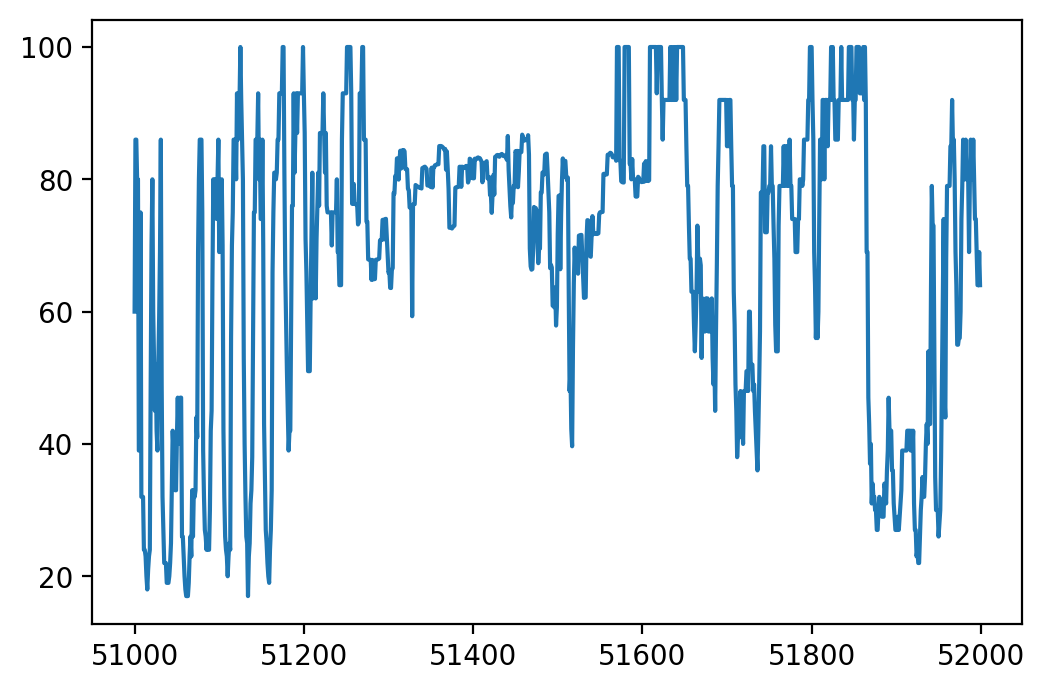

In [26]:
plt.plot(data_b_fill['HUMI'][51000:52000])

<AxesSubplot:xlabel='DEWP', ylabel='Count'>

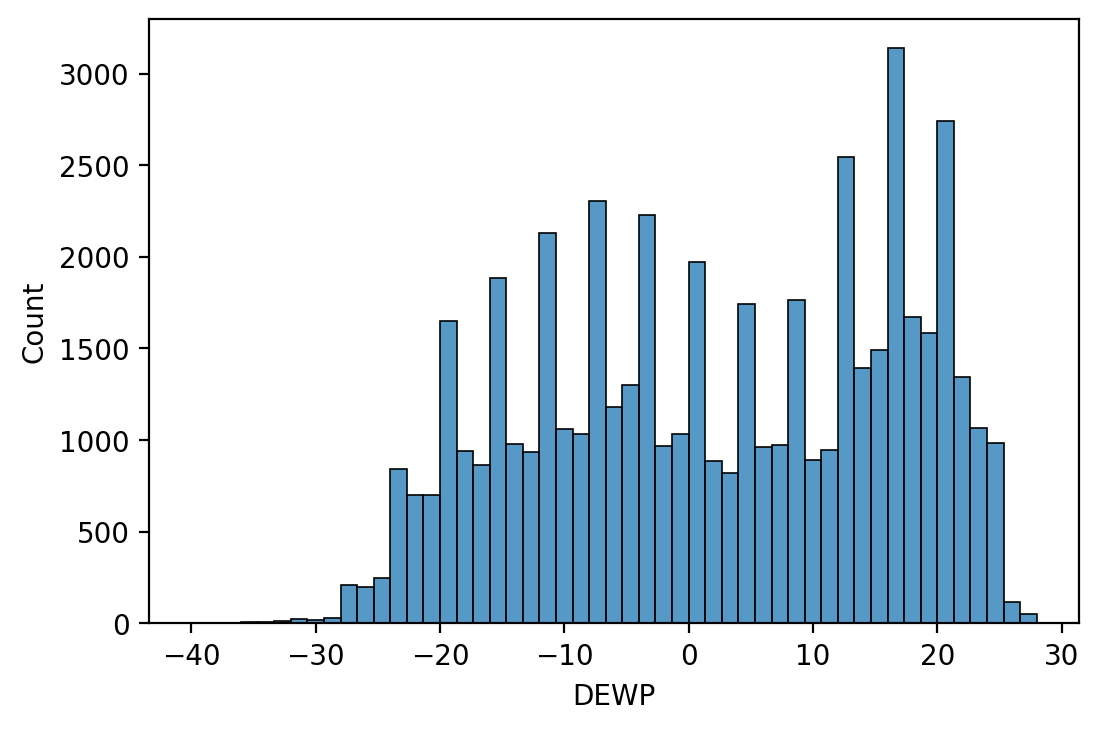

In [100]:
sns.histplot(data_b['DEWP'])

In [28]:
data_b_fill['HUMI'].argmax()

51277

In [37]:
for col in cols_fill:
    print(col, data_b[col][51277], data_b_fill[col][51277], '\n')
# data_b_fill['HUMI'][51277]

DEWP -1.0 -1.0 

HUMI nan 173604.0078359038 

PRES nan -60631.55985392822 

TEMP 4.0 4.0 

Iws 4.92 4.92 

precipitation 0.0 0.0 

Iprec 999990.0 999990.0 

PM_i 16.0 16.0 



<AxesSubplot:xlabel='HUMI', ylabel='Count'>

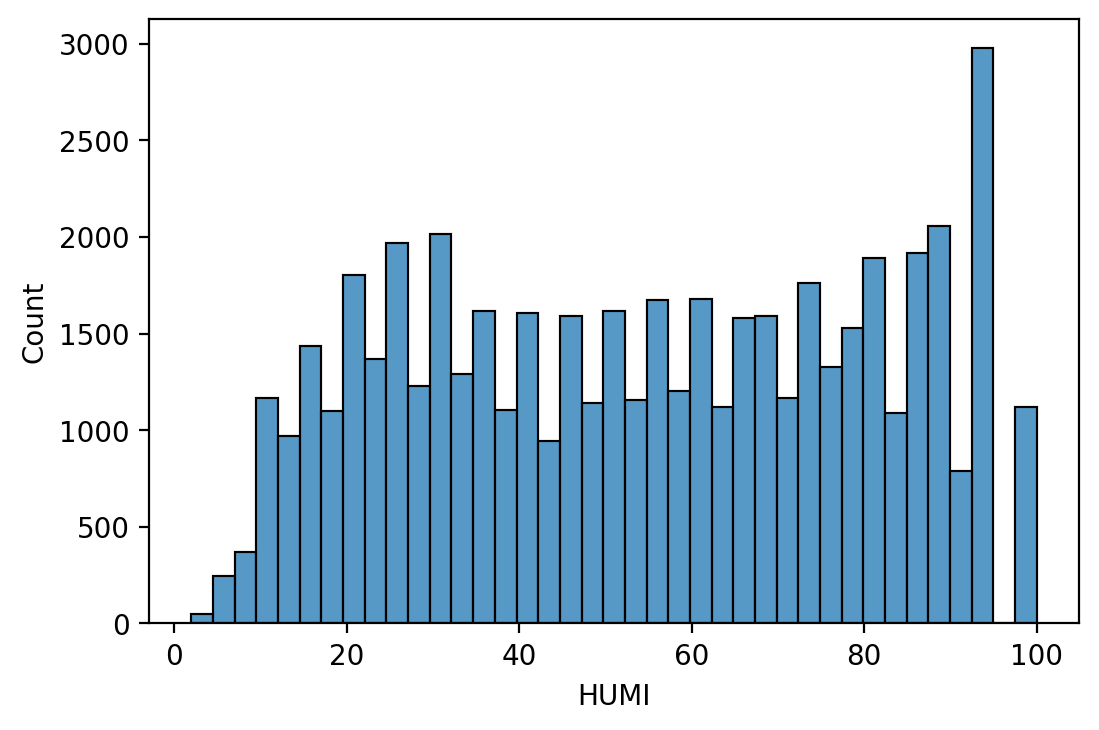

In [108]:
sns.histplot(data_b['HUMI'])

In [36]:
sns.histplot(data_b_fill['PRES'])

<AxesSubplot:xlabel='PRES', ylabel='Count'>

Error in callback <function flush_figures at 0x7f6de22bb170> (for post_execute):


KeyboardInterrupt: 

<AxesSubplot:xlabel='TEMP', ylabel='Count'>

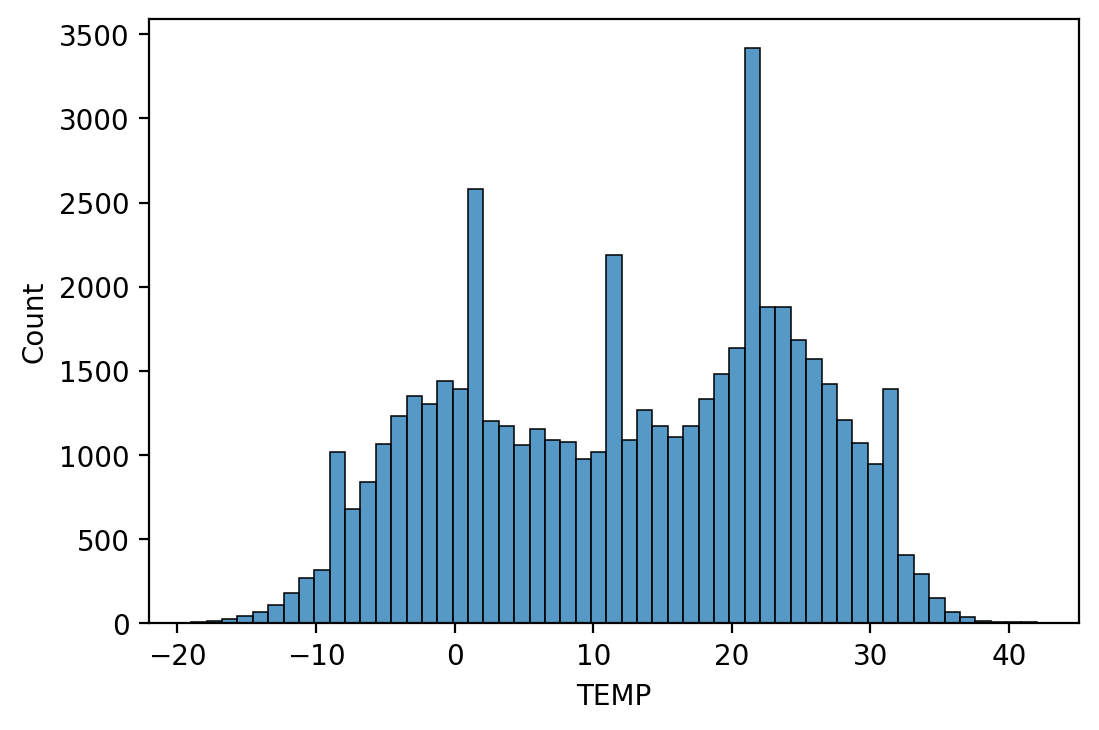

In [110]:
sns.histplot(data_b['TEMP'])

<AxesSubplot:xlabel='Iws', ylabel='Count'>

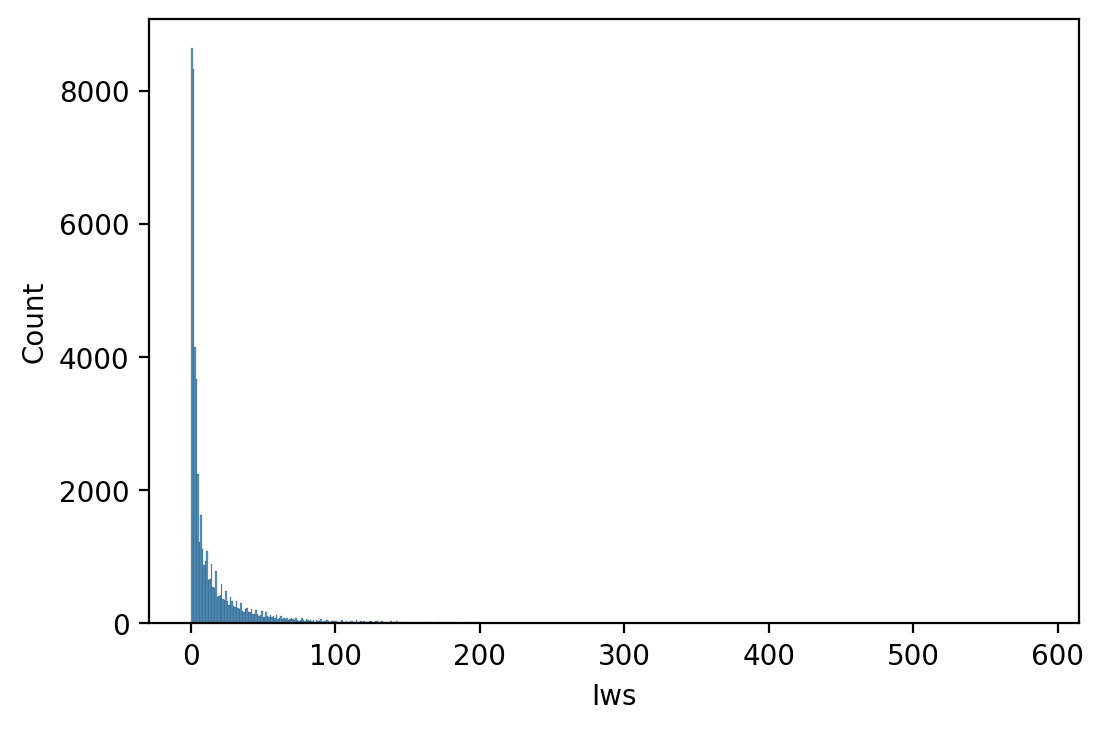

In [111]:
sns.histplot(data_b['Iws'])

In [112]:
data = pd.Series([np.nan,1,1,1,1,1,np.nan,np.nan,np.nan,1,1,np.nan,np.nan])

<AxesSubplot:xlabel='PM', ylabel='Count'>

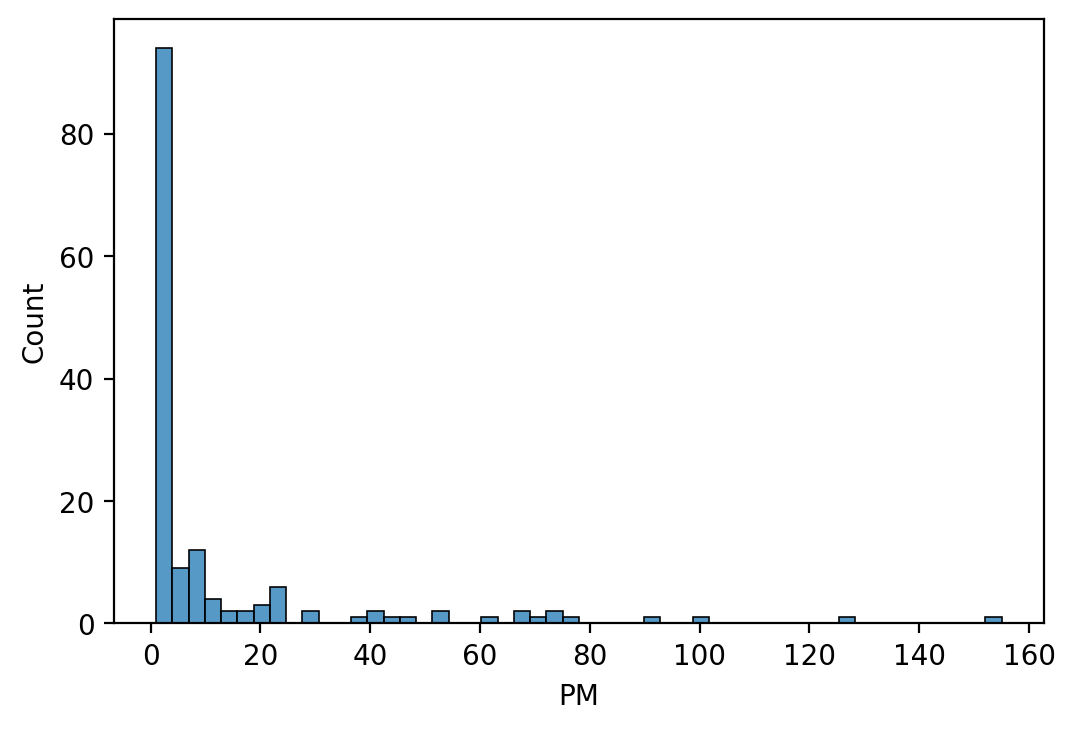

In [118]:
a = data_b['PM']
na_groups = a.notna().cumsum()[a.isna()]
lengths_consecutive_na = na_groups.groupby(na_groups).agg(len)
sns.histplot(lengths_consecutive_na)